# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
import seaborn as sns
import csv
import urllib

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

#Output File(CSV)
output_data_file = "output_data/cities.csv"

#Range of latitudes and longitudes
lat_range = (-90,90)
lng_range = (-180,180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

656

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeather API Key
api_key = "feda5f3575892fd7a400eb18fc84cc76"

# Starting URL for Weather MAP API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

#List of City data
city_data = []

#Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create Counter
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes:
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    #Group cities in sets of 50 for logging purposes:
    city_url = url + "&q=" + urllib.request.pathname2url(city)
    
    #Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)
    
    #Add 1 to the record count
    record_count += 1
    
    #Run on API request for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        #Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
    
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
#Indicate that Data Loading is complete
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tay ninh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=tay%20ninh
Processing Record 2 of Set 1 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=arraial%20do%20cabo
Processing Record 3 of Set 1 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=norman%20wells
Processing Record 4 of Set 1 | kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=kahului
Processing Record 5 of Set 1 | sartana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=sartana
Processing Record 6 of Set 1 | brigantine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=brigantin

Processing Record 2 of Set 2 | kumbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=kumbo
Processing Record 3 of Set 2 | lata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=lata
Processing Record 4 of Set 2 | sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=sitka
Processing Record 5 of Set 2 | hamilton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=hamilton
Processing Record 6 of Set 2 | nemuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=nemuro
Processing Record 7 of Set 2 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=punta%20arenas
Processing Record 8 of Set 2 | gorontalo
http://api.openweathermap.org/data/2.5/weather?units=Imperial

Processing Record 6 of Set 3 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=qaanaaq
Processing Record 7 of Set 3 | ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=ancud
Processing Record 8 of Set 3 | lasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=lasa
Processing Record 9 of Set 3 | kuznechikha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=kuznechikha
Processing Record 10 of Set 3 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=busselton
Processing Record 11 of Set 3 | portland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=portland
Processing Record 12 of Set 3 | belyy yar
http://api.openweathermap.org/data/2.5/weather?units

Processing Record 9 of Set 4 | lumeje
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=lumeje
Processing Record 10 of Set 4 | nioro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=nioro
Processing Record 11 of Set 4 | torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=torbay
Processing Record 12 of Set 4 | fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=fortuna
Processing Record 13 of Set 4 | rawson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=rawson
Processing Record 14 of Set 4 | vila velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=vila%20velha
Processing Record 15 of Set 4 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?units

Processing Record 14 of Set 5 | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=castro
Processing Record 15 of Set 5 | tsihombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=tsihombe
City not found. Skipping...
Processing Record 16 of Set 5 | emmett
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=emmett
Processing Record 17 of Set 5 | haines junction
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=haines%20junction
Processing Record 18 of Set 5 | manta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=manta
Processing Record 19 of Set 5 | dicabisagan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=dicabisagan
Processing Record 20 of Set 5 | tasiilaq
http:

City not found. Skipping...
Processing Record 17 of Set 6 | richards bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=richards%20bay
Processing Record 18 of Set 6 | kyzyl-suu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=kyzyl-suu
Processing Record 19 of Set 6 | senj
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=senj
Processing Record 20 of Set 6 | chuzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=chuzhou
Processing Record 21 of Set 6 | storsteinnes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=storsteinnes
Processing Record 22 of Set 6 | chifeng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=chifeng
Processing Record 23 of Set 6 | cherskiy
http:

Processing Record 19 of Set 7 | tias
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=tias
Processing Record 20 of Set 7 | ascension
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=ascension
City not found. Skipping...
Processing Record 21 of Set 7 | gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=gat
Processing Record 22 of Set 7 | sinnamary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=sinnamary
Processing Record 23 of Set 7 | preobrazheniye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=preobrazheniye
Processing Record 24 of Set 7 | fare
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=fare
Processing Record 25 of Set 7 | domoni
http://api.openweathermap

Processing Record 21 of Set 8 | grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=grindavik
Processing Record 22 of Set 8 | scarborough
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=scarborough
Processing Record 23 of Set 8 | launceston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=launceston
Processing Record 24 of Set 8 | balkanabat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=balkanabat
Processing Record 25 of Set 8 | isla vista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=isla%20vista
Processing Record 26 of Set 8 | ust-barguzin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=ust-barguzin
Processing Record 27 of Set 8 | paamiut
http://api.o

Processing Record 25 of Set 9 | san quintin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=san%20quintin
Processing Record 26 of Set 9 | mrirt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=mrirt
City not found. Skipping...
Processing Record 27 of Set 9 | alice springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=alice%20springs
Processing Record 28 of Set 9 | ambulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=ambulu
Processing Record 29 of Set 9 | cape canaveral
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=cape%20canaveral
Processing Record 30 of Set 9 | north providence
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=north%20providence
Processing R

Processing Record 27 of Set 10 | alyangula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=alyangula
Processing Record 28 of Set 10 | road town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=road%20town
Processing Record 29 of Set 10 | luba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=luba
Processing Record 30 of Set 10 | nome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=nome
Processing Record 31 of Set 10 | miranda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=miranda
Processing Record 32 of Set 10 | newport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=newport
Processing Record 33 of Set 10 | teruel
http://api.openweathermap.org/data/2.5/weather?uni

Processing Record 31 of Set 11 | escazu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=escazu
Processing Record 32 of Set 11 | plettenberg bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=plettenberg%20bay
Processing Record 33 of Set 11 | shache
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=shache
Processing Record 34 of Set 11 | xai-xai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=xai-xai
Processing Record 35 of Set 11 | karratha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=karratha
Processing Record 36 of Set 11 | timra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=timra
Processing Record 37 of Set 11 | dubbo
http://api.openweathermap.org/data/2.

Processing Record 36 of Set 12 | wau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=wau
City not found. Skipping...
Processing Record 37 of Set 12 | qingdao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=qingdao
Processing Record 38 of Set 12 | khandbari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=khandbari
Processing Record 39 of Set 12 | mersing
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=mersing
Processing Record 40 of Set 12 | vao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=vao
Processing Record 41 of Set 12 | eenhana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=eenhana
Processing Record 42 of Set 12 | okhotsk
http://api.openweathermap.org/d

Processing Record 39 of Set 13 | alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=alofi
Processing Record 40 of Set 13 | yerbogachen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=yerbogachen
Processing Record 41 of Set 13 | qasigiannguit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=qasigiannguit
Processing Record 42 of Set 13 | ust-tsilma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=ust-tsilma
Processing Record 43 of Set 13 | gilroy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=gilroy
Processing Record 44 of Set 13 | batemans bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=feda5f3575892fd7a400eb18fc84cc76&q=batemans%20bay
Processing Record 45 of Set 13 | mwinilunga
http://api.o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data_pd = pd.DataFrame(city_data)

lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

city_data_pd.count()

City          590
Cloudiness    590
Country       590
Date          590
Humidity      590
Lat           590
Lng           590
Max Temp      590
Wind Speed    590
dtype: int64

In [5]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tay ninh,48,VN,1542414508,94,11.30,106.10,76.02,4.41
1,arraial do cabo,100,BR,1542414262,95,-22.97,-42.02,74.35,14.25
2,norman wells,20,CA,1542409200,75,65.28,-126.83,-16.61,4.70
3,kahului,20,US,1542412560,65,20.89,-156.47,84.02,18.34
4,sartana,92,UA,1542414508,90,47.17,37.70,31.60,14.58


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

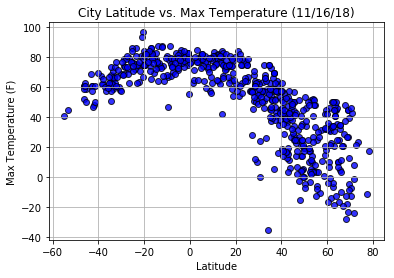

In [6]:
plt.scatter(lats,
            max_temps,
            color="blue",
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

#### Latitude vs. Humidity Plot

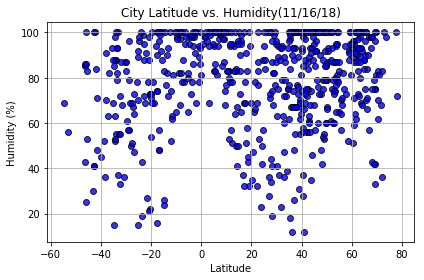

In [7]:
plt.scatter(lats,
            humidity,
            color="blue",
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha = 0.8,
            label="Cities")

plt.title("City Latitude vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.tight_layout()
plt.show()

#### Latitude vs. Cloudiness Plot

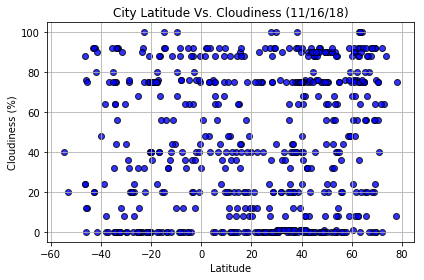

In [10]:
plt.scatter(lats,
            cloudiness,
            color="blue", 
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha = 0.8,
            label="Cities")

plt.title("City Latitude Vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.tight_layout()
plt.show()

#### Latitude vs. Wind Speed Plot

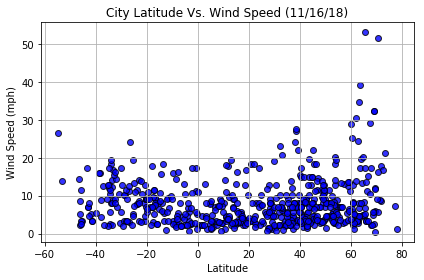

In [11]:
plt.scatter(lats,
            wind_speed,
            color="blue",
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")

plt.title("City Latitude Vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.tight_layout()
plt.show()